In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from openpyxl import load_workbook

def get_sheetnames_xlsx(filepath):
    wb = load_workbook(filepath, read_only=True, keep_links=False)
    return wb.sheetnames
get_sheetnames_xlsx('results-2021-cefas-website.xlsx')

['Flesh results',
 'Phytoplankton results',
 'Methods characteristics',
 'Abbreviations ']

In [ ]:
df = pd.read_excel('results-2021-cefas-website.xlsx', skiprows=1, skipfooter=12, sheet_name='Phytoplankton results')
df.head()

Sample number  ... Prorocentrum cordatum \ncells L-1\n(Venerupin) 
0          1/21  ...                                              ND
1          2/21  ...                                              ND
2          3/21  ...                                              ND
3          4/21  ...                                              ND
4          5/21  ...                                              ND

[5 rows x 14 columns]

In [ ]:
df.to_csv('phytoplanktons.csv', index=False)

In [ ]:
for i in range(df.shape[1]):
  print(i, df.columns[i], df.iloc[:, i].unique()[:12])

0 Sample number ['1/21' '2/21' '3/21' '4/21' '5/21' '6/21' '7/21' '9/21' '10/21' '11/21'
 '12/21' '13/21']
1 Production area ['Solent' 'Southampton Water' 'Brancaster' 'Porlock' 'Blackwater'
 'North Kent Coast' 'West Mersea' 'Fowey' 'Lantivet Bay' 'Mevagissey Bay'
 'St Austell Bay' 'Holy Island-Ross Links']
2 Bed ID ['B24BK' 'B21AT' 'B05AS' 'B094D' 'B14AD' 'B17BS' 'B013Z' 'B70AB' 'B70AH'
 'B70AK' 'B70AE' 'B001M']
3 Local authority ['Southampton PHA' 'Kings Lynn & W Norfolk BC'
 'Somerset West and Taunton Council' 'Maldon DC' 'Canterbury CC'
 'Colchester BC' 'Cornwall PHA' 'Northumberland CC' 'Plymouth PHA'
 'Bournemouth, Poole and Christchurch Council' 'Dorset Council'
 'East Suffolk DC']
4 Grid reference

Note 1              ['SZ57479794' 'SU48760530' 'TF79884539' 'SS87114787' 'TM04060768'
 'TR10326689' 'TM00001301' 'SX13025157' 'SX16305094' 'SX05214698'
 'SX05744972' 'NU12333958']
5 Sampling point ['Browndown' 'Hamble Estuary' 'Norton Creek Mussels' 'Porlock East'
 'St Peters Flats' 

In [ ]:
df = df[:828]

### We already know from the data description that the columns we are most interested in are the following:
• Alexandrium spp. cells L-1 (PSP)
• Dinophysiaceae cells L-1 (DSP)
• Prorocentrum lima cells L-1 (DSP)
• Pseudo-nitzschia spp. cells L-1 (ASP)

In [ ]:
col_inds = [7, 8, 9, 10]

In [ ]:
# Check the unique values for each column above

for col_ind in col_inds:
  print(df.iloc[:, col_ind].unique())

['ND' 'Unable to analyse, too much sediment' 200 40 100 120 80 320 400 500
 'NOT TESTED, SUBMITTED IN ERROR' 160 240]
['ND' 'Unable to analyse, too much sediment' 40 80 160 520 240 320 200 280
 400 120 800 1360 720 640 680 nan 1880 100 2960 1400 480 1320 1000 760]
['ND' 'Unable to analyse, too much sediment' 100 40 200 120 nan 400 18520
 17480]
['ND' 400 'Unable to analyse, too much sediment' 200 800 600 80 1000 160
 320 560 3600 1160 2400 2700 12720 1400 240 640 880 960 3200 1080 840 3800
 2360 4600 8760 3480 120 1920 1760 280 1960 5600 4280 3960 8100 10300 3000
 1480 720 2080 8600 185500 60900 1800 6280 2900 1900 2000 1840 2280 7080
 13080 17400 13720 11300 8300 2100 360 1200 4800 1120 66400 152900 71400
 13520 42120 38520 1640 1300 6440 3280 13680 252000 18400 1600 8000 1360
 5800 760 7560 27800 289400 68760 15280 23000 34600 60000 43000 6640 8800
 16600 17120 6320 48400 1100 162000 24600 4200 8920 16320 1680 520 220
 2840 1240 3080 15100 52700 4700 11560 45440 3520 52200 19240 1100

In [ ]:
# replace ND values with 0
def clean(df, col_inds):
  df = df.copy().iloc[:, col_inds]
  for col in df.columns:
    df.loc[:, col].replace({'ND':0}, inplace=True)
    df.loc[:, col] = pd.to_numeric(df.loc[:, col], errors='coerce').fillna(-1)

  return df

cleaned_df = clean(df, col_inds)

In [ ]:
cleaned_df.columns = [f'col{n+1}' for n in range(4)]
cleaned_df

col1  col2  col3    col4
0     0.0   0.0   0.0     0.0
1     0.0   0.0   0.0     0.0
2     0.0   0.0   0.0   400.0
3     0.0   0.0   0.0     0.0
4     0.0   0.0   0.0     0.0
..    ...   ...   ...     ...
823   0.0  40.0   0.0  7080.0
824   0.0   0.0   0.0     0.0
825   0.0  40.0   0.0     0.0
826   0.0   0.0   0.0     0.0
827   0.0   0.0   0.0     0.0

[828 rows x 4 columns]

In [ ]:
def label(df, thresh=[40, 100, 100, 150000]):
  lab = df.copy()
  assert len(lab.columns) == len(thresh), f"The number of columns in the dataframe must be equal to the number of items in {thresh}"
  for col, thr in zip(lab.columns, thresh):
    lab.loc[:, col] = np.where(lab.loc[:, col] >= thr, 1, 0)

  return lab.any(1).astype(int)

cleaned_df_label = label(cleaned_df)

In [ ]:
cleaned_df['label'] = cleaned_df_label

cleaned_df.head()

col1  col2  col3   col4  label
0   0.0   0.0   0.0    0.0      0
1   0.0   0.0   0.0    0.0      0
2   0.0   0.0   0.0  400.0      0
3   0.0   0.0   0.0    0.0      0
4   0.0   0.0   0.0    0.0      0

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import *
from keras.utils import np_utils

## Using a wide(deep) network

__Architecture:__ 

* An input layer with a dimension equal to the number of features
* A hidden layer with 1000 neurons and a sigmoid activation
* A dropout layer with 0.5 probability
* A hidden layer with 512 neurons and a sigmoid activation
* output layer with 1 neuron and a sigmoid activation

__Optimizer__: `adam` 

__Loss__: `binary_crossentropy`

In [ ]:
model = Sequential()
model.add(Dense(units=1000, activation='sigmoid' ))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='sigmoid' ))
model.add(Dense(1, activation='sigmoid'))

# model.summary()
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    cleaned_df.drop('label', axis=1), cleaned_df.label, test_size=0.20, random_state=42
    )

epochs = 10
history = model.fit(x_train, y_train,
    batch_size=16,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 11ms/step - loss: 0.3276 - accuracy: 0.9094 - val_loss: 0.1793 - val_accuracy: 0.9578
Epoch 2/10
42/42 [==============================] - 0s 8ms/step - loss: 0.1929 - accuracy: 0.9396 - val_loss: 0.2022 - val_accuracy: 0.9277
Epoch 3/10
42/42 [==============================] - 0s 8ms/step - loss: 0.2210 - accuracy: 0.9350 - val_loss: 0.1895 - val_accuracy: 0.9337
Epoch 4/10
42/42 [==============================] - 0s 7ms/step - loss: 0.1665 - accuracy: 0.9532 - val_loss: 0.1363 - val_accuracy: 0.9578
Epoch 5/10
42/42 [==============================] - 0s 8ms/step - loss: 0.1853 - accuracy: 0.9350 - val_loss: 0.1821 - val_accuracy: 0.9398
Epoch 6/10
42/42 [==============================] - 0s 7ms/step - loss: 0.1941 - accuracy: 0.9441 - val_loss: 0.1518 - val_accuracy: 0.9639
Epoch 7/10
42/42 [==============================] - 0s 7ms/step - loss: 0.1799 - accuracy: 0.9471 - val_loss: 0.2138 - val_accuracy: 0.9337
Epoch 8/10
42/42 [=

## Using a Deep(wide) Neural Network

__Architecture:__ 

* An input layer with a dimension equal to the number of features
* A hidden layer with 100 neurons and a  activation
* A dropout layer with 0.2 probability
* A hidden layer with 512 neurons and a sigmoid activation
* output layer with 1 neuron and a sigmoid activation

__Optimizer__: `adam` 

__Loss__: `binary_crossentropy`

In [ ]:
model = Sequential()

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

# model.summary()
model.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(0.001,), metrics=['accuracy'])


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    cleaned_df.drop('label', axis=1), cleaned_df.label, test_size=0.20, random_state=42
    )

epochs = 10
history = model.fit(x_train, y_train,
    batch_size=16,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 7ms/step - loss: 0.3844 - accuracy: 0.8822 - val_loss: 0.3423 - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3589 - accuracy: 0.8837 - val_loss: 0.3374 - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.8837 - val_loss: 0.3303 - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8837 - val_loss: 0.2869 - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2771 - accuracy: 0.8867 - val_loss: 0.2208 - val_accuracy: 0.9217
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.9169 - val_loss: 0.2095 - val_accuracy: 0.9337
Epoch 7/10
42/42 [==============================] - 0s 4ms/step - loss: 0.1991 - accuracy: 0.9441 - val_loss: 0.1930 - val_accuracy: 0.9277
Epoch 8/10
42/42 [==

## Deep and Wide Network

__Architecture__:

_Deep_:
    
- An input layer with a dimension equal to the number of features
- A hidden layer with 1000 neurons and a sigmoid activation
- A hidden layer with 1000 neurons and a sigmoid activation
- An output layer with 1 neuron and a sigmoid activation

_Wide_:

- An input layer with a dimension equal to the number of features
- An output layer with 1 neuron and a sigmoid activation


__Optimizers__: _Deep_ - `rmsprop`; _Wide_ - `rmsprop`

__Loss__: `binary_crossentropy`

In [ ]:
# wide_columns = [tf.contrib.layers.real_valued_column(col) for col in cleaned_df.columns]

# deep_columns = [tf.contrib.layers.real_valued_column(col) for col in cleaned_df.columns]
from tensorflow.keras.experimental import *

linear_model = tf.keras.experimental.LinearModel(activation='sigmoid')

dnn_model = keras.Sequential([Dense(1000, 'sigmoid'),
                              # Dropout(0.5),
                              Dense(1000, 'sigmoid'),
                              # Dropout(0.5),
                              Dense(1, 'sigmoid')])
combined_model = WideDeepModel(linear_model, dnn_model)
combined_model.compile(optimizer=['sgd', 'rmsprop'], loss='binary_crossentropy', metrics=['accuracy'])


epochs = 10
history = combined_model.fit([x_train, x_train], y_train,
    batch_size=16,
    epochs=epochs,
    verbose=1,
    validation_data=([x_test, x_test], y_test)
)
score = combined_model.evaluate([x_test, x_test], y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 2s 20ms/step - loss: 1.3001 - accuracy: 0.7492 - val_loss: 1.1274 - val_accuracy: 0.9036
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 1.0328 - accuracy: 0.8943 - val_loss: 1.2838 - val_accuracy: 0.5120
Epoch 3/10
42/42 [==============================] - 1s 16ms/step - loss: 1.0053 - accuracy: 0.8927 - val_loss: 1.0447 - val_accuracy: 0.8976
Epoch 4/10
42/42 [==============================] - 1s 16ms/step - loss: 0.9556 - accuracy: 0.9109 - val_loss: 1.2784 - val_accuracy: 0.8735
Epoch 5/10
42/42 [==============================] - 1s 16ms/step - loss: 0.7779 - accuracy: 0.9139 - val_loss: 0.7760 - val_accuracy: 0.9277
Epoch 6/10
42/42 [==============================] - 1s 15ms/step - loss: 0.7122 - accuracy: 0.9381 - val_loss: 0.7258 - val_accuracy: 0.9337
Epoch 7/10
42/42 [==============================] - 1s 15ms/step - loss: 0.7201 - accuracy: 0.9290 - val_loss: 0.6615 - val_accuracy: 0.9398
Epoch 8/10
42

Deep network accuracy: 0.9639

Wide network accuracy: 0.9338

Deep wide network accuracy: 0.9398

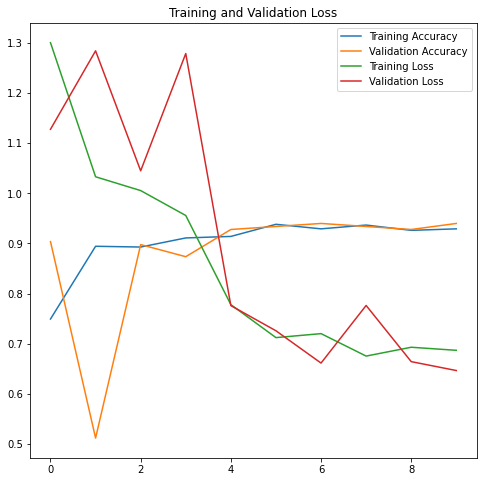

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

To verify that the model has learnt, let us compare the prediction made by the model above to setting predicting all the test data as 0.

In [ ]:
predictions = np.zeros(len(x_test))

from sklearn.metrics import accuracy_score

accuracy_score(predictions, y_test)

0.891566265060241

The accuracy is 89.2% while the one from the model is 96.0%, which shows that our model has learned a bit but can do more.

## Data Augmentation

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

sm = SMOTE()

x_train_samp, y_train_samp = sm.fit_resample(x_train, y_train)

In [ ]:
x_train_samp.shape, y_train_samp.shape

((1170, 4), (1170,))

In [ ]:
model = Sequential()


model.add(Dense(units=1000, activation='sigmoid' ))
# model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='sigmoid' ))
model.add(Dense(1, activation='sigmoid'))

# model.summary()
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    cleaned_df.drop('label', axis=1), cleaned_df.label, test_size=0.20, random_state=42
    )

epochs = 10
history = model.fit(x_train_samp, x_train_samp,
    batch_size=16,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 12ms/step - loss: 0.3243 - accuracy: 0.9018 - val_loss: 0.2608 - val_accuracy: 0.9337
Epoch 2/10
42/42 [==============================] - 0s 8ms/step - loss: 0.2107 - accuracy: 0.9366 - val_loss: 0.1632 - val_accuracy: 0.9398
Epoch 3/10
42/42 [==============================] - 0s 8ms/step - loss: 0.1944 - accuracy: 0.9411 - val_loss: 0.2221 - val_accuracy: 0.9398
Epoch 4/10
42/42 [==============================] - 0s 8ms/step - loss: 0.2026 - accuracy: 0.9381 - val_loss: 0.1576 - val_accuracy: 0.9518
Epoch 5/10
42/42 [==============================] - 0s 8ms/step - loss: 0.1753 - accuracy: 0.9441 - val_loss: 0.1477 - val_accuracy: 0.9578
Epoch 6/10
42/42 [==============================] - 0s 7ms/step - loss: 0.1778 - accuracy: 0.9396 - val_loss: 0.1461 - val_accuracy: 0.9518
Epoch 7/10
42/42 [==============================] - 0s 8ms/step - loss: 0.1645 - accuracy: 0.9486 - val_loss: 0.1371 - val_accuracy: 0.9578
Epoch 8/10
42/42 [=

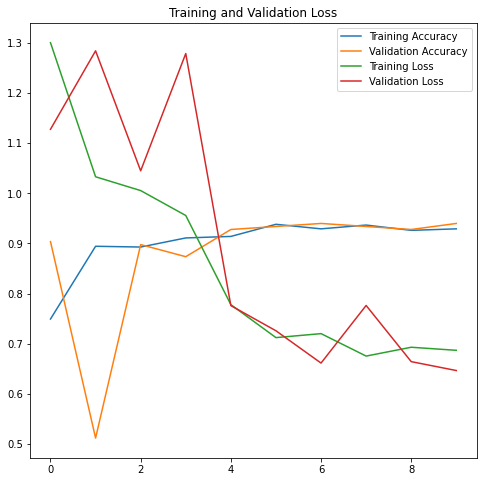

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

> **Why do you think your accuracy is not higher / lower?**

The accuracy should be high because the problem is relatively trivial as it has clearly defined logic that can be encoded.

It is not higher because the neural architectures aren't not complex enough to encode the pattern in the dataset.

> **What effect does the optimisation function have on network performance?**

According to [TowardsDataScience.com](https://towardsdatascience.com/overview-of-various-optimizers-in-neural-networks-17c1be2df6d5), an optimization function is used to change the parameters of network such as weights and learning rates to minimize/maximize the loss/objective.

> **What happens if you include more than 4 layers?**

Including more than 4 layers produces a deeper (more complex) model which theoritically should be able to learn more complex patterns in the data, but it makes the model prone to overfitting - a condition whereby the model does so well on the train data because it learns specific patterns in the train dataset but is unable to replicate that on new (test) dataset.

> **What is the effect of the data size on your accuracy?**

A large dataset provides several varieties of examples that help the model to generalize it's performance and reduce overfitting. It also means that less time would be spent tuning the model performance.

In [ ]:
import seaborn as sns

In [ ]:
cleaned_df

col1  col2  col3    col4  label
0     0.0   0.0   0.0     0.0      0
1     0.0   0.0   0.0     0.0      0
2     0.0   0.0   0.0   400.0      0
3     0.0   0.0   0.0     0.0      0
4     0.0   0.0   0.0     0.0      0
..    ...   ...   ...     ...    ...
823   0.0  40.0   0.0  7080.0      0
824   0.0   0.0   0.0     0.0      0
825   0.0  40.0   0.0     0.0      0
826   0.0   0.0   0.0     0.0      0
827   0.0   0.0   0.0     0.0      0

[828 rows x 5 columns]

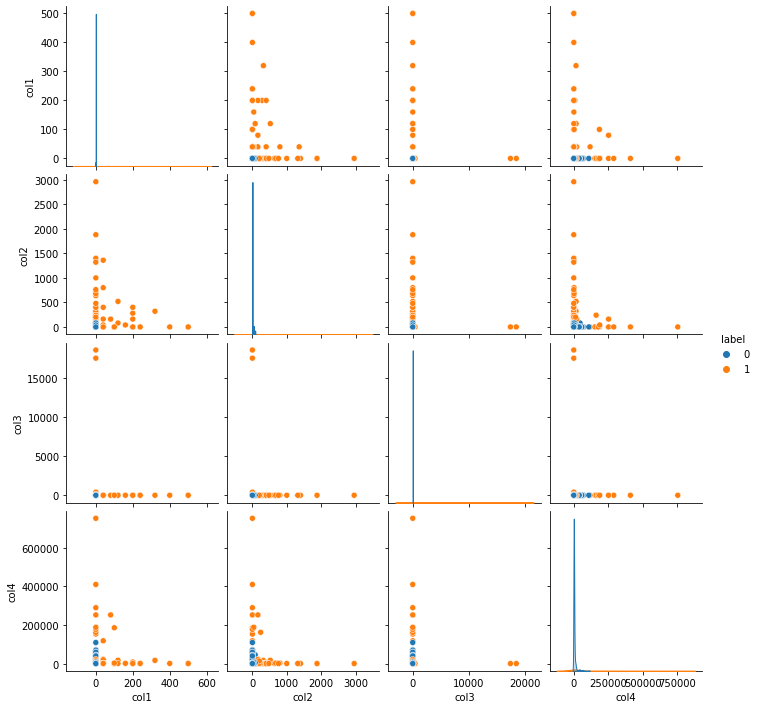

In [ ]:
fig = sns.pairplot(cleaned_df, hue='label')
fig.figure.savefig('Pairplot.png')
# cleaned_df.col1.unique()

# Component 2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 4318 files belonging to 4 classes.
Using 3455 files for training.
Found 4318 files belonging to 4 classes.
Using 863 files for validation.
['bus', 'motorcycle', 'plane', 'train']
(32, 256, 256, 3)
(32,)
0.0 1.0


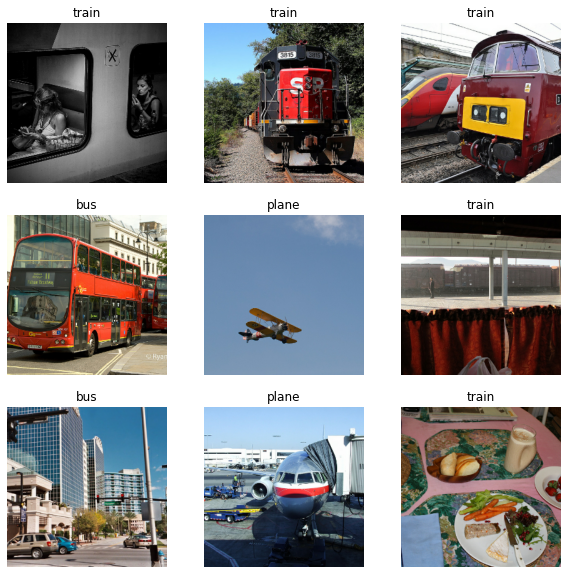

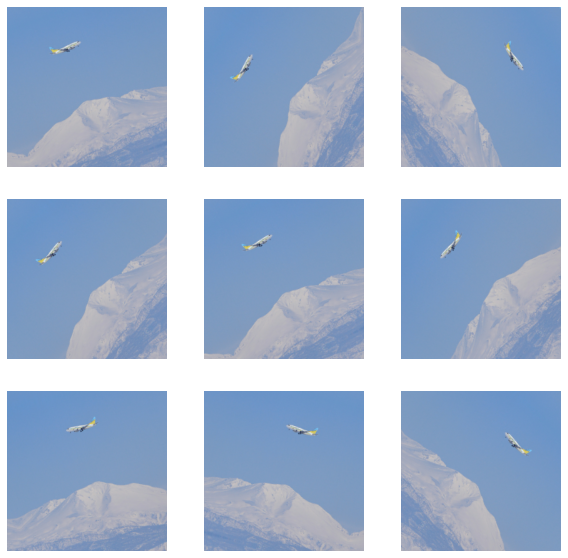

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

from google.colab import drive 
drive._mount('/content/gdrive')

#data_dir = "gdrive/My Drive/flower_photos"
data_dir = "gdrive/My Drive/Tutorial Videos/ai_assignment"

batch_size = 32
img_height = 256
img_width = 256

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  # image_size=(img_height, img_width),
  batch_size=batch_size,
  crop_to_aspect_ratio=True)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  # image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(img_height, img_width)
  # tf.keras.layers.experimental.preprocessing.CenterCrop(img_height, img_width),
  # layers.experimental.preprocessing.Rescaling(1./255)
])

for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0]/255)
    plt.axis('off')

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

num_classes = 4
preprocess_input = tf.keras.applications.xception.preprocess_input

train_ds = train_ds.map(lambda x, y: (preprocess_input(data_augmentation(x)), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

Epoch 1/5
108/108 [==============================] - 79s 703ms/step - loss: 0.6816 - accuracy: 0.7355 - val_loss: 0.5042 - val_accuracy: 0.8262
Epoch 2/5
108/108 [==============================] - 75s 697ms/step - loss: 0.5579 - accuracy: 0.7838 - val_loss: 0.3916 - val_accuracy: 0.8586
Epoch 3/5
108/108 [==============================] - 75s 699ms/step - loss: 0.5165 - accuracy: 0.8078 - val_loss: 0.3967 - val_accuracy: 0.8505
Epoch 4/5
108/108 [==============================] - 75s 692ms/step - loss: 0.4837 - accuracy: 0.8171 - val_loss: 0.4135 - val_accuracy: 0.8540
Epoch 5/5
108/108 [==============================] - 75s 694ms/step - loss: 0.4959 - accuracy: 0.8151 - val_loss: 0.3997 - val_accuracy: 0.8610


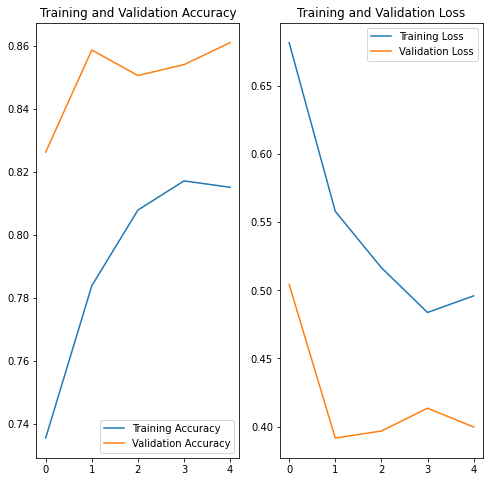

In [28]:
base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape=(img_height, img_width, 3))

base_model.trainable = False

# model = Sequential([
#   base_model,
#   layers.GlobalAveragePooling2D(),
#   layers.Dropout(0.5),
#   layers.Dense(4096, activation='relu'),
#   layers.BatchNormalization(),
#   layers.Dropout(0.5),
#   layers.Dense(1024, activation='relu'),
#   layers.Dense(num_classes)
# ])

global_average_layer = layers.GlobalAveragePooling2D()

inputs = tf.keras.Input(shape=(img_height, img_width, 3))
# x = data_augmentation(inputs)
x = inputs
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
# x = layers.Dense(4096, activation='relu')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes)(x)
model = tf.keras.Model(inputs, outputs)

initial_learning_rate = 0.1
decay_steps = 100.0
decay_rate = 0.5

# Scheduling the learning rate to decrease ivnersely with time to avoid missing the minima
learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate, decay_steps, decay_rate)

model.compile(optimizer=keras.optimizers.SGD(learning_rate=initial_learning_rate, ),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# model.summary()

epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [29]:
print("Avg validation acc:", sum(val_acc)/len(val_acc))

Avg validation acc: 0.8500579476356507


## Evaluating the CNN on 20 new images

In [46]:
%%bash
# unzip "gdrive/MyDrive/Tutorial Videos/Vehicles.zip" -d "gdrive/MyDrive/Tutorial Videos/"

Archive:  gdrive/MyDrive/Tutorial Videos/Vehicles.zip
   creating: gdrive/MyDrive/Tutorial Videos/Vehicles/bus/
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/bus/bus.jpg  
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/bus/images.jpg  
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/bus/IMG_2576.PNG  
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/bus/IMG_2578.JPG  
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/bus/IMG_2579.JPG  
   creating: gdrive/MyDrive/Tutorial Videos/Vehicles/motorcycle/
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/motorcycle/IMG_2597.JPG  
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/motorcycle/IMG_2599.JPG  
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/motorcycle/IMG_2600.JPG  
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/motorcycle/IMG_2601.JPG  
  inflating: gdrive/MyDrive/Tutorial Videos/Vehicles/motorcycle/IMG_2603.JPG  
   creating: gdrive/MyDrive/Tutorial Videos/Vehicles/plane/
  inflating: gd

In [58]:
test_dir = "gdrive/MyDrive/Tutorial Videos/test_images_/"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  shuffle=False,
  batch_size=batch_size)

class_names = test_ds.class_names
class_names

Found 20 files belonging to 4 classes.


['bus', 'motorcycle', 'plane', 'train']

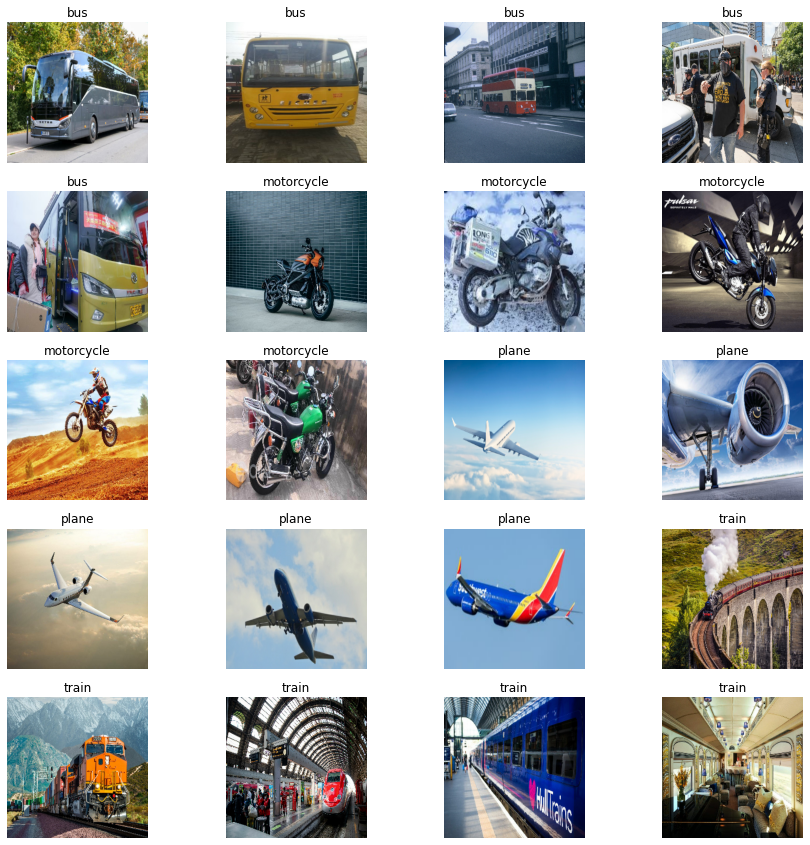

In [59]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"{class_names[labels[i]]}")
        # | Predicted: {class_names[predictions.argmax(1)[i]]}
        plt.axis("off")


plt.show()

In [60]:
x_test, y_test = test_ds.map(lambda x, y: (preprocess_input(x), y)).as_numpy_iterator().next()

x_test.shape, y_test.shape

((20, 256, 256, 3), (20,))

In [61]:
loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy

1/1 [==============================] - 0s 303ms/step - loss: 0.0615 - accuracy: 1.0000


(0.06149735301733017, 1.0)

In [62]:
predictions = model.predict(x_test)

In [63]:
predictions.argmax(1)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

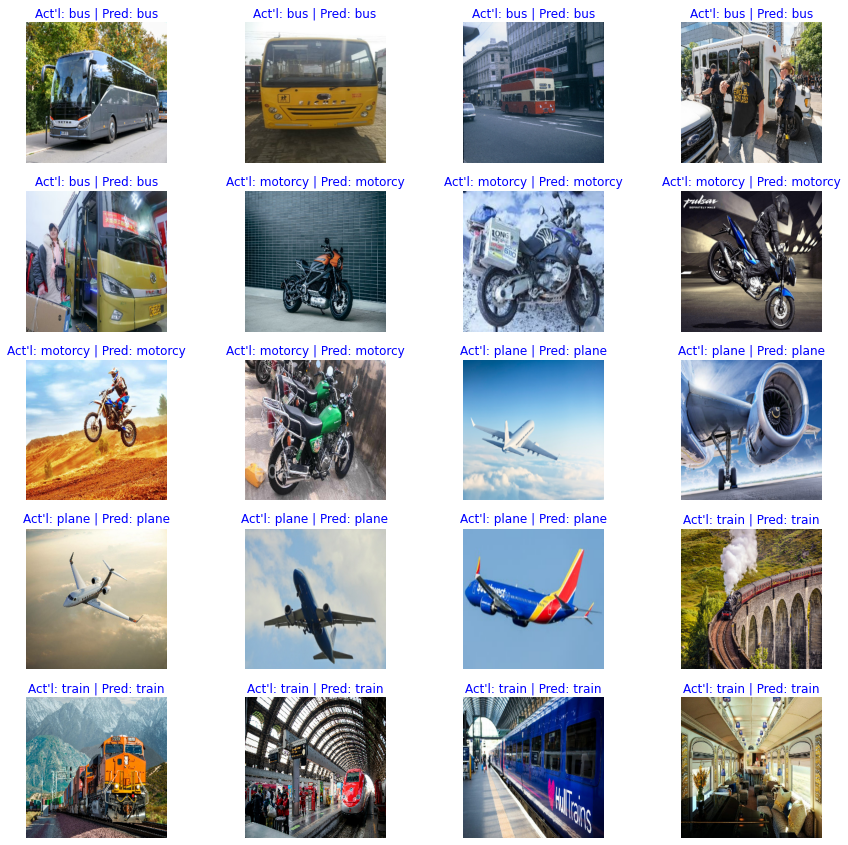

In [64]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        color='blue'
        if labels[i] != predictions.argmax(1)[i]:
            color='red'
        plt.title(f"Act'l: {class_names[labels[i]][:7]} | Pred: {class_names[predictions.argmax(1)[i]][:7]}", color=color)
        plt.axis("off")


plt.show()

> **How long does the network need to train until reaching an accuracy of 95%?**

The network never reached an accuracy of 95%. The following are the possible reasons:

- Small data size: This is a common problem in CNNs accoring to [IEEEExplore](https://ieeexplore.ieee.org/document/8599448#:~:text=In%20particular%2C%20data%20set%20size%20have%20a%20significant%20impact%20on%20performance.&text=Observe%20changes%20in%20accuracy%20to,the%20higher%20the%20test%20accuracy.). Larger training sets provide greater number of examples for the model to generalize. It thus avoids overfitting on the train data and makes it possible to build a complex DNN as well as to trian the model for a longer period. All of these couldn't be achieved because of the size of this dataset.

- Inconsistent data labelling: During exploration, I noticed that some images were shown of the interior of a train which perhaps may be the only exmaple (or just one of very few examples that are similar). Such examples may not even appear in the training set which makes it difficult to predict on them.

> **What is the tradeoff between using many layers (i.e. having a “deeper” ) and accuracy? And layers and time?**

The tradeoff between a deeper network and accuracy can be analyzed from points of view:


1. Improved accuracy due to the ability of multiple layers to learn complex patterns in the dataset. This usually works when the dataset is large enough.

2. Reduced test accuracy due to the propensity of the a deep network to "memorize" the training data when the examples are few enough, thus leading to poor generalization on the test data.

--------------
The tradeoff between a deeper network and time can be analyzed from points of view: A deeper network has more parameters to change and update on each step, thus increasing the duration per step.

> **What is the effect of changing the pooling mechanism, e.g. average vs max?**

Average pooling gives a smoothout effect on a group of features, giving a better representation than max pooling which focuses on the pixels with the highest intensity. In effect, max pooling can ignore some important features that are prominent intensity-wise. [medium.com](https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9#:~:text=Average%20pooling%20method%20smooths%20out,lighter%20pixels%20of%20the%20image.)

## MOdel Explainability

In [65]:
%%bash
pip install tf-explain -q

In [66]:
from tf_explain.core.grad_cam import GradCAM

# # Load a sample image (or multiple ones)
# IMAGE_PATH = '/content/gdrive/MyDrive/Tutorial Videos/test_images_/bus/1.jpg'
# img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(img_height, img_width))
# img = tf.keras.preprocessing.image.img_to_array(img)
# img = preprocess_input(img)
# image = images.numpy()[0]

data = (x_test, None)

# Start explainer
explainer = GradCAM()
grid = explainer.explain(data, base_model, class_index=0)  # 281 is the tabby cat index in ImageNet

explainer.save(grid, ".", "grad_cam.png")


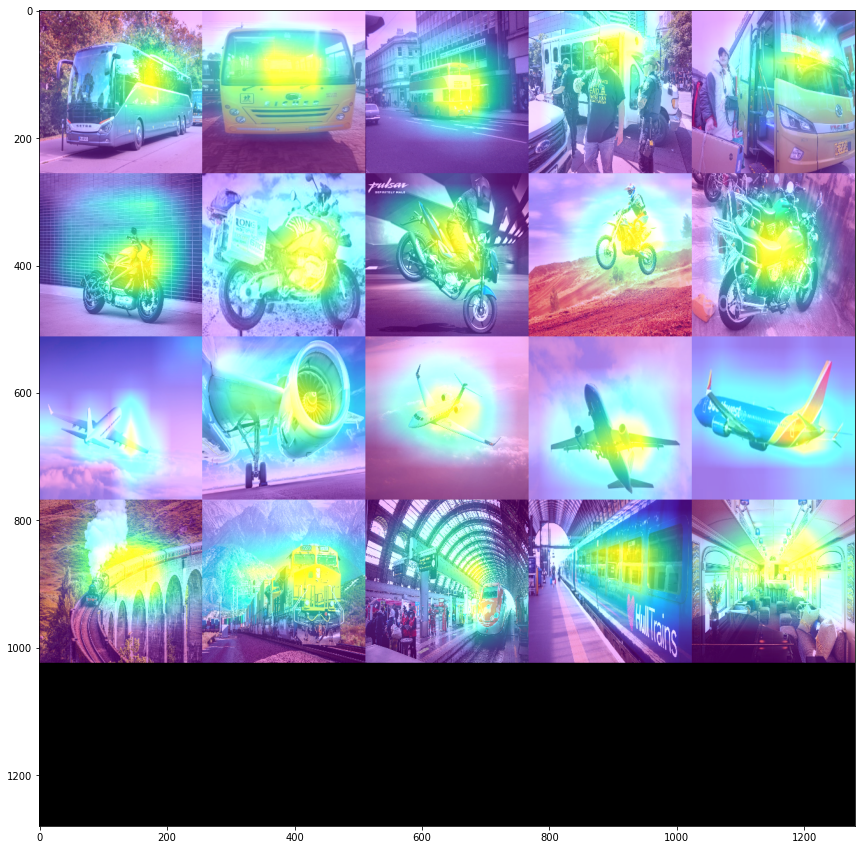

In [67]:
plt.figure(figsize=(15,15))
plt.imshow(grid.astype("uint8"))
plt.show()
